In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

Loading Dataset

In [3]:
#csv file
import pandas as pd

movie = pd.read_csv('iMovie_imdb.csv')

movie.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,3.5,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,3.5,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,3.5,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,3.5,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,3.5,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Explaratory Data Analysis

In [4]:
#dataset shape

movie.shape

(7668, 15)

In [5]:
#describe the dataset

movie.describe()

,rating,year,score,votes,budget,gross,runtime
count,7668.000000,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,3.691510,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,1.036004,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,0.500000,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,3.000000,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,4.000000,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,4.500000,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,5.000000,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
#checking for missing values
import matplotlib.pyplot as plt
import seaborn as sns   

movie.isnull().sum()

name           0
rating         0
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#data information
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   float64
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(6), int64(1), object(8)
memory usage: 898.7+ KB


In [8]:
#checking for duplicated values

movie.duplicated().value_counts()

False    7668
Name: count, dtype: int64

In [9]:
#cleaning dataset
import re

def clean_name(name):
    title = re.sub('[^a-zA-Z0-9 ]','', name)

In [10]:
movie["clean_name"] = movie["name"].apply(clean_name)

In [11]:
movie

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,clean_name
0,The Shining,3.5,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,None
1,The Blue Lagoon,3.5,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,None
2,Star Wars: Episode V - The Empire Strikes Back,3.5,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,None
3,Airplane!,3.5,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,None
4,Caddyshack,3.5,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,2.0,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,None
7664,Dream Round,4.0,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,None
7665,Saving Mbango,4.0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,None
7666,It's Just Us,3.0,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,None


In [12]:
#cleaning dataset

from sklearn.model_selection import train_test_split
X = movie.drop(columns=['clean_name']) # Features
y = movie['clean_name'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


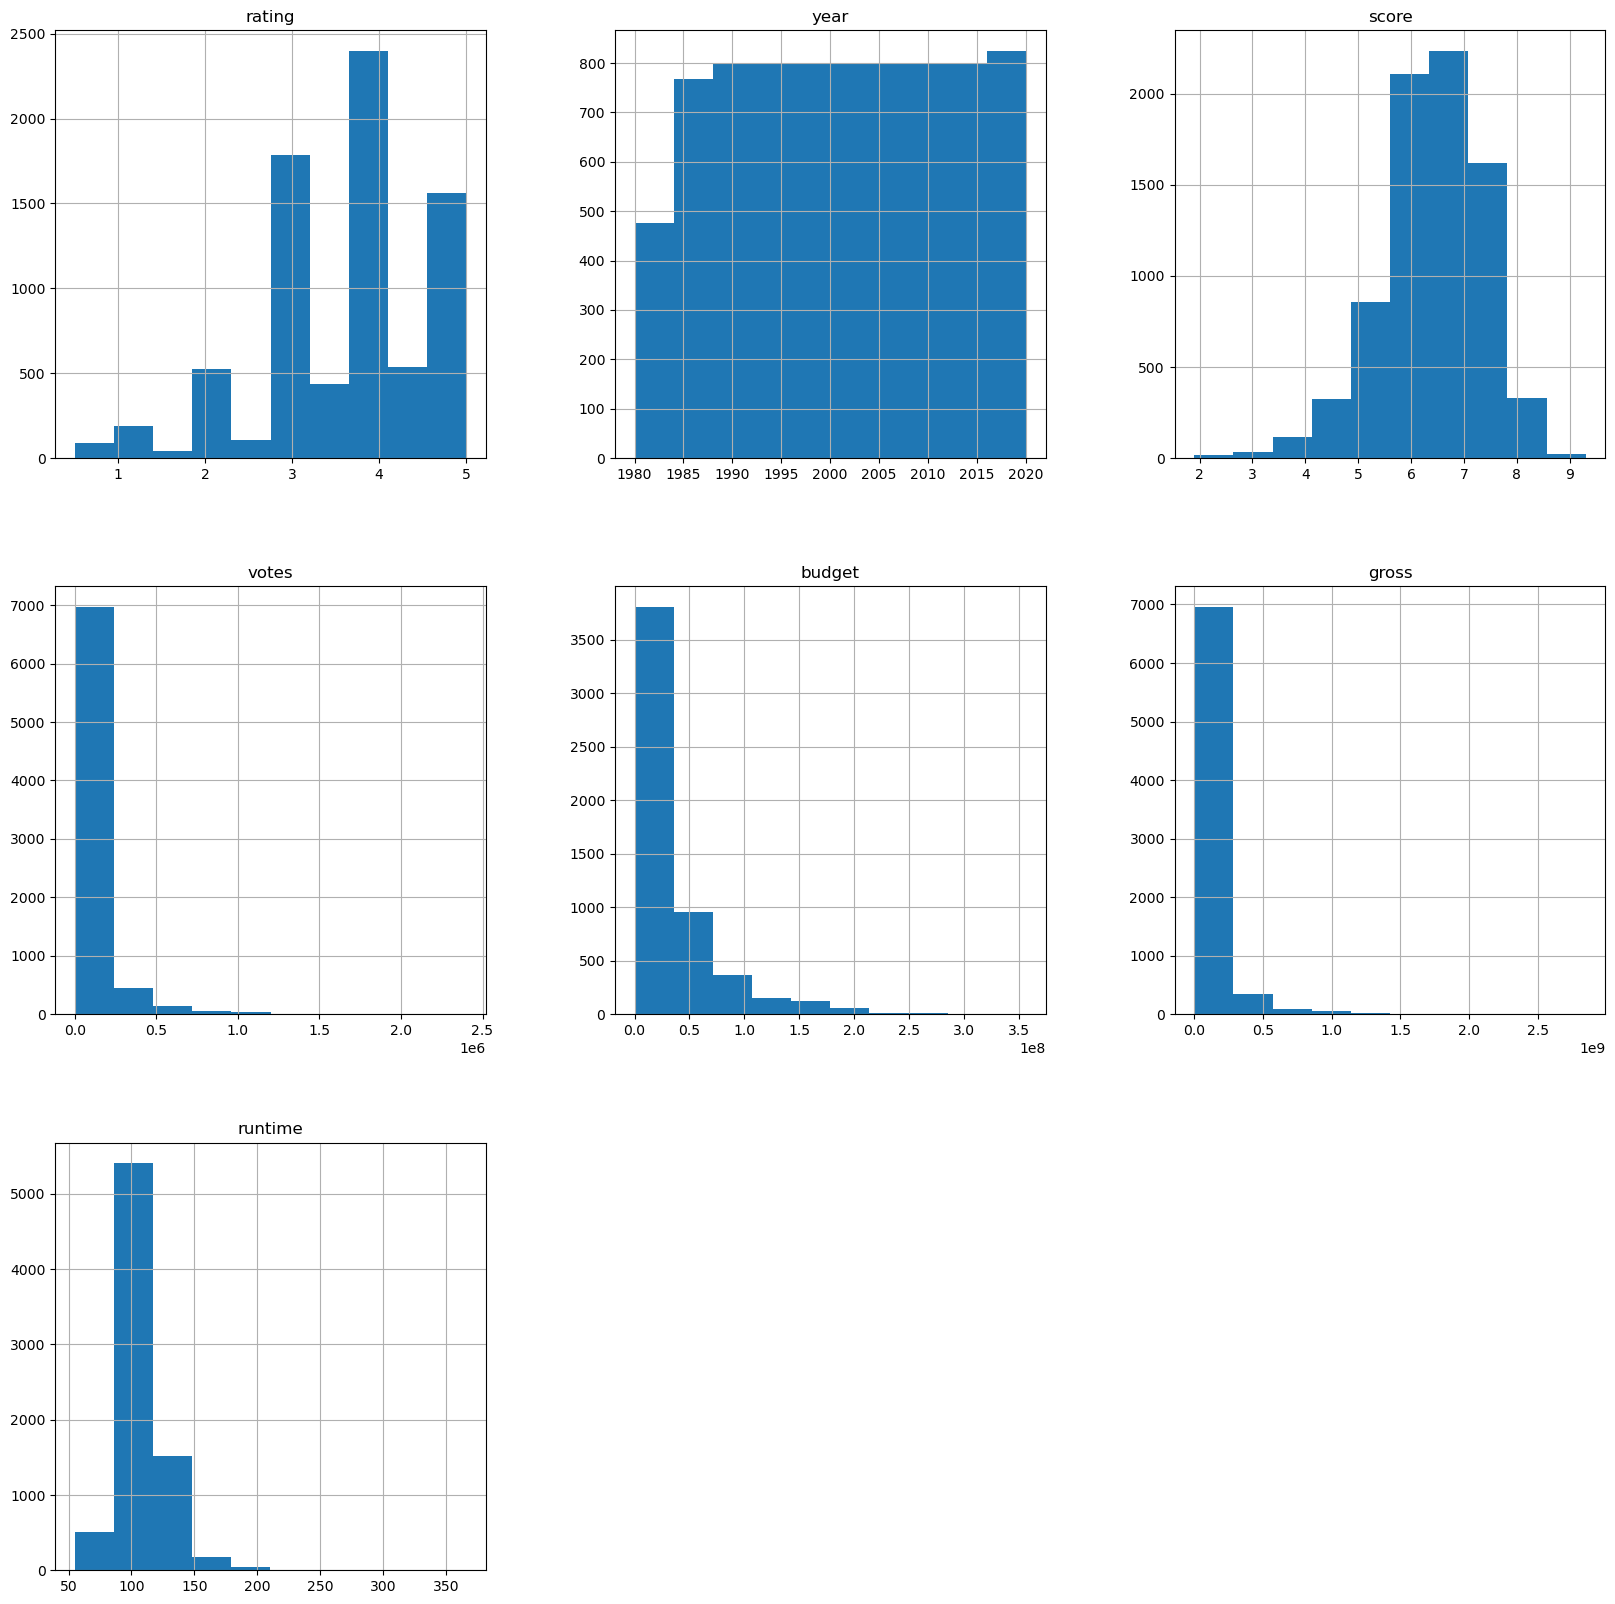

In [13]:
#visualize numerical distribution

import matplotlib.pyplot as plt

movie.hist(figsize=(20,20)) 
plt.show()   

Feature Engineering and Selection

1. Feature distribution
2. Popular genres based on score
3. Movies based on genres
4. Popular genre based on mean score
5. Top 10 popular actor/actress (star)
6. Top 10 popular actor/actress (star) with the most votes
7. Top 10 popular directors
8. Top 25 movies based on the highest budget
9. Top 25 movies sort by score
10. Top 25 movies based on the highest gross

In [14]:
#feature distribution of the dataset

feature_distribution = make_subplots(rows=3, cols=3, subplot_titles=('<i>rating', '<i>genre', '<i>year', '<i>score'))
feature_distribution.add_trace(go.Histogram(x=movie['rating'], name='rating'), row=1, col=1)
feature_distribution.add_trace(go.Histogram(x=movie['genre'], name='genre'), row=1, col=2)
feature_distribution.add_trace(go.Histogram(x=movie['year'], name='year'), row=1, col=3)
feature_distribution.add_trace(go.Histogram(x=movie['score'], name='score'), row=2, col=1)

feature_distribution.update_layout(height=600, width=600, title_text='<b>Feature Distribution</b>')
feature_distribution.update_layout(template='plotly_dark', title_x=0.5)
feature_distribution.show()

In [15]:
#visualize the genres based on score

genres_score=px.histogram(movie.groupby('genre', as_index=False).sum().sort_values(by='score', ascending=True), x='genre', y='score', color_discrete_sequence=['#2ca02c'], template='plotly_dark',marginal='box', title='<b>Popular Genres Based On Score')

genres_score.update_layout(title_x=0.5)

In [16]:
# visualize movies based on genres

movies_genres=px.histogram(movie.groupby('genre', as_index=False).count().sort_values(by='name', ascending=True), x='genre', y='name', color_discrete_sequence=['purple'], template='plotly_dark', marginal='box', title='<b>Movies Based on Genres</b>')

movies_genres.update_layout(title_x=0.5)


In [17]:
#  visualize popular genres based on mean score

numeric_columns = movie.select_dtypes(include=[np.number]).columns
movie_mean = movie.groupby('genre', as_index=False)[numeric_columns].mean().sort_values(by='score', ascending=True)

genre_mean_score =px.histogram(movie_mean, x='genre', y='score', color_discrete_sequence=['aquamarine'], template='plotly_dark', marginal='box', title='<b>Popular Genres Based on Mean Score')

genre_mean_score.update_layout(title_x=0.5, yaxis_title='Mean Score')

In [18]:
# visualize top 10 popular star

top_stars = px.bar(movie.groupby('star',as_index=False).sum().sort_values(by='score',ascending=False).head(10),x='star',y='score',color_discrete_sequence=['#ff7f00'],template='plotly_dark',text='score',title='<b>Top 10 Popular Actor/Actress')
top_stars.update_layout(title_x=0.5)

In [19]:
# visualize top 10 popular stars with the most votes

popular_stars = px.bar(movie.groupby('star',as_index=False).sum().sort_values(by='votes',ascending=False).head(10),x='star',y='votes',color_discrete_sequence=['#FFD700'],template='plotly_dark',text='votes',title='<b>Top 10 Popular Actor/Actress with the Most Votes')
popular_stars.update_layout(title_x=0.5)

In [20]:
# visualize top 10 popular directors

popular_directors = px.bar(movie.groupby('director',as_index=False).sum().sort_values(by='score',ascending=False).head(10),x='director',y='score',hover_data=['name'],color_discrete_sequence=['#ff4500'],template='plotly_dark',text='score',title='<b>Top 10 Popular Directors')
popular_directors.update_layout(title_x=0.5)

In [21]:
# visualize top 25 movies based on the highest budget

fig=px.line(movie.sort_values(by='budget',ascending=False).head(25),x='name',y='budget',hover_data=['director'],color_discrete_sequence=['#FF00FF'],template="plotly_dark",markers=True,title='<b> Top 25 movies based on the highest budget')
fig.update_layout(title_x=0.5)
fig.show()

In [22]:
# visualize top 25 movies sort by score

fig=px.line(movie.sort_values(by='score',ascending=False).head(25),x='name',y='score',hover_data=['director'],color_discrete_sequence=['#2ca02c'],template="plotly_dark",markers=True,title='<b> Top 25 movies sort by score')
fig.update_layout(title_x=0.5)
fig.show()

In [23]:
# visualize top 25 movies based on the highest gross

fig=px.line(movie.sort_values(by='gross',ascending=False).head(25),x='name',y='gross',hover_data=['director'],color_discrete_sequence=['white'],template="plotly_dark",markers=True,title='<b style="color: aquamarine;"> Top 25 movies based on the highest gross')
fig.update_layout(title_x=0.5, xaxis=dict(tickmode='linear', dtick=1))
fig.show()

In [24]:
# drop the columns that are not required in the feature engineering
movie.drop(columns=['released'], inplace=True)
movie.drop(columns=['director'], inplace=True)
movie.drop(columns=['writer'], inplace=True)
movie.drop(columns=['star'], inplace=True)
movie.drop(columns=['country'], inplace=True)
movie.drop(columns=['budget'], inplace=True)
movie.drop(columns=['gross'], inplace=True)
movie.drop(columns=['company'], inplace=True)
movie.drop(columns=['runtime'], inplace=True)
movie.drop(columns=['clean_name'], inplace=True)

Feature Engineering and Selection

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2)) # Create a vectorizer object

# Create the TF-IDF matrix

tfidf = vectorizer.fit_transform(movie["name"])

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def search(name):
    # title = re.sub('[^a-zA-Z0-9 ]','', name) # Clean the input name
    query_vec = vectorizer.transform([name]) # Transform the input name into a vector
    similarity = cosine_similarity(query_vec, tfidf).flatten() # Calculate cosine similarity
    matched_movie = movie[movie["name"].str.lower() == name.lower()]
    target_genre= None
    target_rating=None
    if not matched_movie.empty:
        target_genre=matched_movie.iloc[0]['genre']
        target_rating=matched_movie.iloc[0]['rating']

    top_indices = np.argpartition(similarity, -50)[-50:]
    similar_movies = movie.iloc[top_indices].copy()
    similar_movies["similarity"] = similarity[top_indices]
    
    if target_genre and target_rating:
        similar_movies= similar_movies[
            similar_movies['genre'].str.contains(target_genre.split()[0], case=False, na=False)&(abs(similar_movies['rating']-target_rating)<= 1.0)
        ]


    similar_movies=similar_movies.sort_values(by='similarity', ascending=False).head(5) 
    
    return similar_movies

In [27]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Step 1: Get unique genres for dropdown
unique_genres = sorted(set(g for g_list in movie["genre"].dropna() for g in g_list.split()))

# Step 2: Create dropdown widget
genre_dropdown = widgets.Dropdown(
    options=[" Select Genre "] + unique_genres,
    value=" Select Genre ",
    description="Genre:",
    disabled=False
)

# Step 3: Create output area
genre_output = widgets.Output()

# Step 4: Define the function that runs when dropdown changes
def on_genre_change(change):
    with genre_output:
        clear_output()
        selected_genre = change["new"]
        if selected_genre != "Select Genre":
            # Filter and sort movies by genre and rating
            filtered = movie[movie["genre"].str.contains(selected_genre, case=False, na=False)]
            sorted_movies = filtered.sort_values(by="rating", ascending=False)
            display(sorted_movies[["name", "genre", "rating", "year", "score", "votes"]].head(10))

# Step 5: Link dropdown to the function
genre_dropdown.observe(on_genre_change, names='value')

# Step 6: Display everything
display(genre_dropdown, genre_output)

Dropdown(description='Genre:', options=(' Select Genre ', 'Action', 'Adventure', 'Animation', 'Biography', 'Co…

Output()

In [28]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    # value='Toy Story',
    placeholder='🔍 Enter keywords...',
    description='Movie Name:',
    disabled=False # False to enable the text box
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        Name = data["new"]
        if len(Name) > 3:

            display(search(Name))

movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='', description='Movie Name:', placeholder='🔍 Enter keywords...')

Output()